<a href="https://colab.research.google.com/github/etappau/Images/blob/master/Image_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/etappau/Images.git

Cloning into 'Images'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [0]:
from fastai.vision import *

In [0]:
path = Path("Images/Img")

In [47]:
path.ls()

[PosixPath('Images/Img/valid'),
 PosixPath('Images/Img/train'),
 PosixPath('Images/Img/models')]

In [0]:
data = ImageDataBunch.from_folder(path, train= 'train', valid= 'valid',  size = 224, bs = 8)

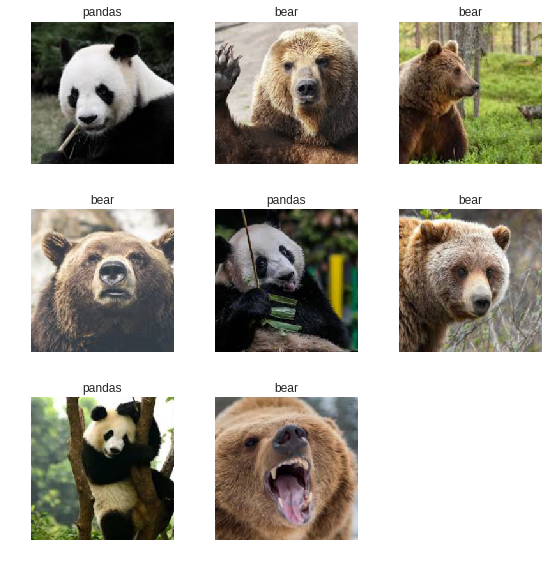

In [49]:
data.show_batch(figsize=(8,8))

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


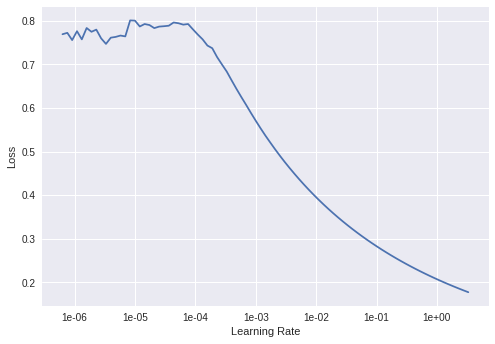

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.965956,0.364378,0.800000,00:00


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

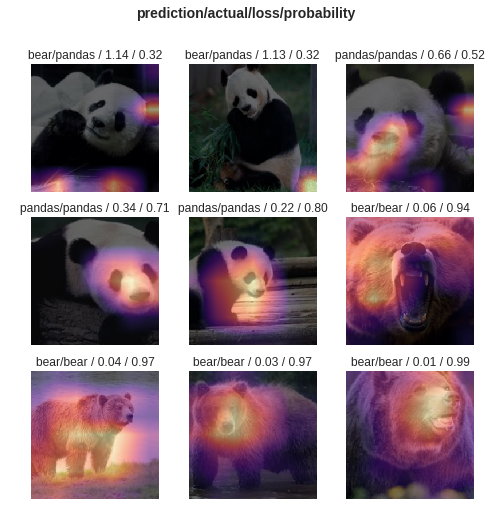

In [58]:
interp.plot_top_losses(9, figsize=(8, 8))

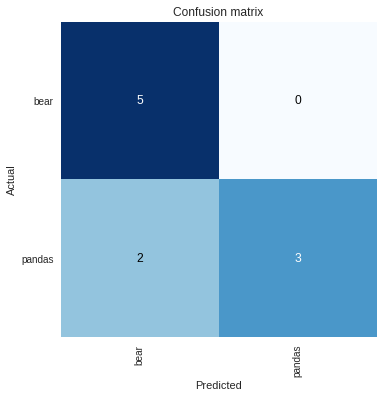

In [59]:
interp.plot_confusion_matrix()

In [0]:
image = learn.data.valid_ds[0][0]

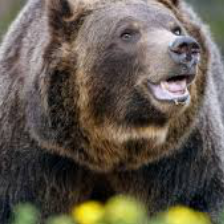

In [68]:
image

In [66]:
learn.predict(image)

(Category bear, tensor(0), tensor([0.9653, 0.0347]))